Creating RawArray with float64 data, n_channels=1, n_times=250
    Range : 0 ... 249 =      0.000 ...     4.980 secs
Ready.


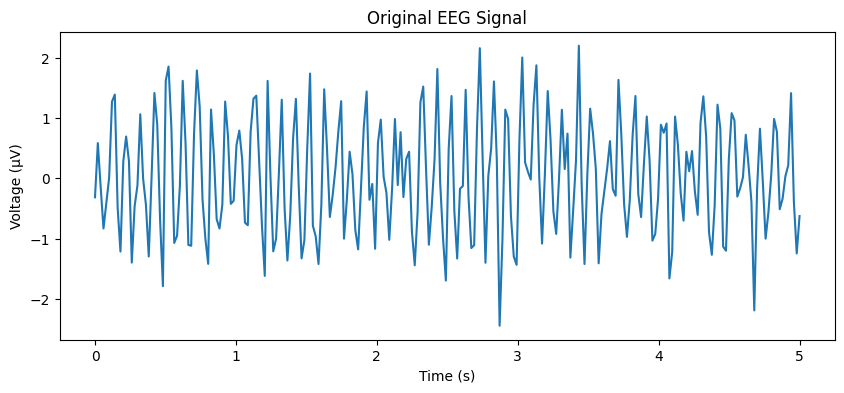

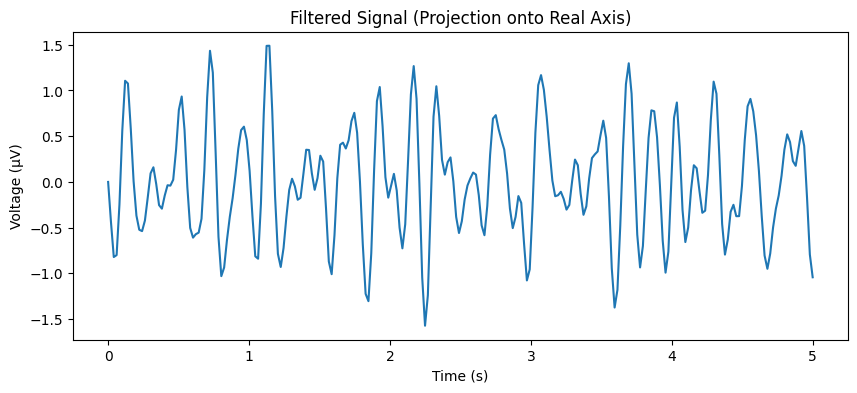

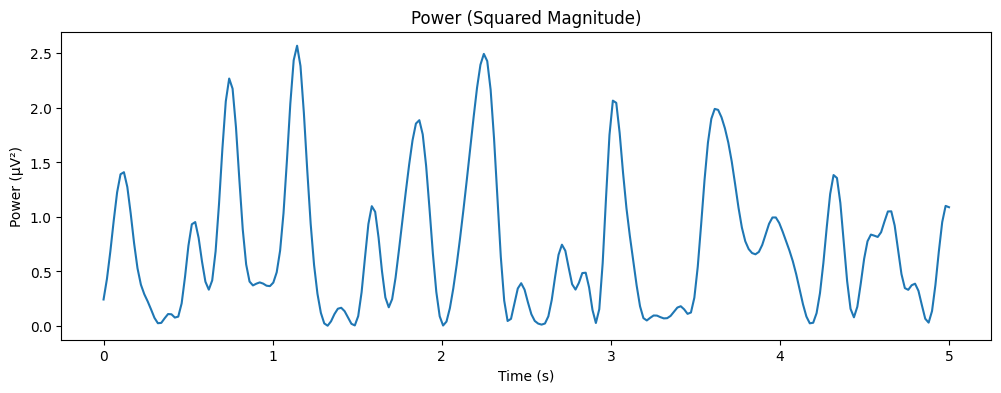

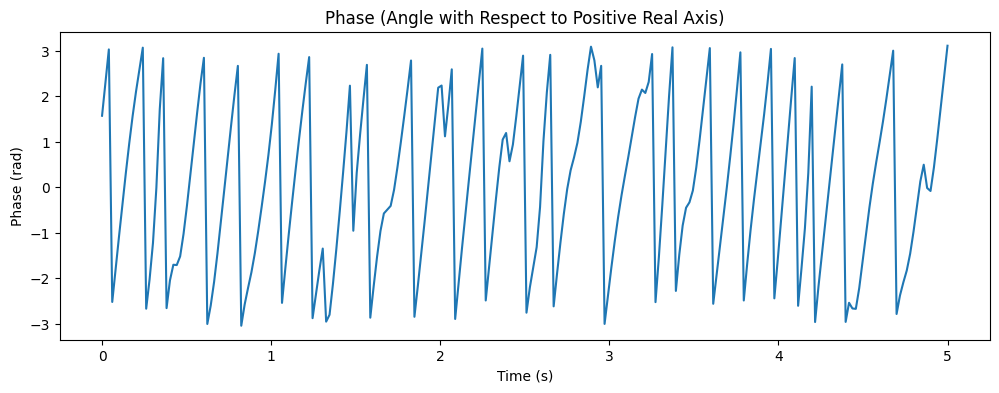

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import mne

# Generate a small synthetic EEG-like signal
fs = 50  # Sampling frequency in Hz
duration = 5  # Duration in seconds
t = np.linspace(0, duration, fs * duration)  # Time vector
# Synthetic signal: 10 Hz sine wave with noise
eeg_signal = np.sin(2 * np.pi * 10 * t) + np.random.normal(0, 0.5, len(t))

# Create an MNE Info object
info = mne.create_info(ch_names=['EEG 001'], sfreq=fs, ch_types=['eeg'])

# Create an MNE Raw object from the EEG signal
raw = mne.io.RawArray(eeg_signal[np.newaxis, :], info)

# Plot the original EEG signal
plt.figure(figsize=(10, 4))
plt.plot(t, eeg_signal)
plt.title('Original EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (µV)')
plt.show()

# Reshape data to include an epoch dimension (1 epoch in this case)
data = raw.get_data()[np.newaxis, ...]

# Morlet wavelet transform
frequencies = np.arange(5, 20, 5)  # Define frequencies of interest
n_cycles = frequencies / 2.  # Define number of cycles in the wavelet

# Compute power and phase
power = mne.time_frequency.tfr_array_morlet(data, sfreq=fs, freqs=frequencies, n_cycles=n_cycles, output='power')
complex_signal = mne.time_frequency.tfr_array_morlet(data, sfreq=fs, freqs=frequencies, n_cycles=n_cycles, output='complex')
phase = np.angle(complex_signal)

# Select a single frequency for demonstration (e.g., 10 Hz)
freq_index = 0  # Adjust as necessary to select the frequency of interest
filtered_signal = np.real(complex_signal[0, 0, freq_index, :])

# Plot the filtered signal (projection onto real axis)
plt.figure(figsize=(10, 4))
plt.plot(t, filtered_signal)
plt.title('Filtered Signal (Projection onto Real Axis)')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (µV)')
plt.show()

# Plot the power (squared magnitude)
plt.figure(figsize=(12, 4))
plt.plot(t, power[0, 0, freq_index, :])
plt.title('Power (Squared Magnitude)')
plt.xlabel('Time (s)')
plt.ylabel('Power (µV²)')
plt.show()

# Plot the phase
plt.figure(figsize=(12, 4))
plt.plot(t, phase[0, 0, freq_index, :])
plt.title('Phase (Angle with Respect to Positive Real Axis)')
plt.xlabel('Time (s)')
plt.ylabel('Phase (rad)')
plt.show()
